In [4]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data') # CSV 파일을 데이터프레임으로 변환
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# 어떤 종류의 생선이 있는지 확인 
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
# 입력 데이터 준비
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [7]:
# 타깃 데이터 준비
fish_target = fish['Species']

In [8]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [9]:
# 표준화 - 훈련 세트의 통계 값으로 테스트 세트를 변환해야 함
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### k-최근접 이웃 분류기의 확률 예측
- 분류 모델은 예측뿐만 아니라 예측의 근거가 되는 확률 출력 가능
- k-최근접 이웃 모델은 이웃한 샘플의 클래스 비율이므로 항상 정해진 확률만 출력

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [12]:
# 테스트 세트에 있는 처음 5개 샘플의 타깃값 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [50]:
# KNeighborsClassifier에서 정렬된 타깃값
print(kn.classes_)

# 클래스별 확률값 반환
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) #소수점 네번째 자리까지 표기

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# kneighbors() 메서드의 입력은 2차원 배열이어야 함
# 슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열 생성

distances, indexes = kn.kneighbors(test_scaled[3:4])
# print(train_target.iloc[indexes[0]])
print(np.array([train_target.iloc[indexes[0]]]))

[['Roach' 'Perch' 'Perch']]


#### 로지스틱 회귀
- 선형 방정식을 사용한 분류 알고리즘
- 출력값을 0〜1 사이로 압축 -> 이 값을 마치 0〜100% 사이의 확률로 이해 가능

이진 분류 vs 다중 분류
- 이진 분류 : 하나의 선형 방정식을 훈련 -> 이 방정식의 출력값을 시그모이드 함수에 통과시켜 0~1 사이의 값으로 변환 -> 값이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단
- 다중 분류 : 타깃 클래스가 2개 이상, 클래스 개수만큼 방정식을 훈련 -> 각 방정식의 출력값을 소프트 맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 만든 후 이 값을 각 클래스에 대한 확률로 이해

시그모이드 함수 vs 소프트맥스 함수

- 시그모이드 함수 (로지스틱 함수) : 하나의 선형 방정식의 출력값을 0 ~ 1 사이로 압축
- 소프트맥스 함수 (정규화된 지수 함수) : 여러 개의 선형 방정식의 출력값을 0 〜 1 사이의 확률로 압축하고 전체 합이 1이 되도록 만듦

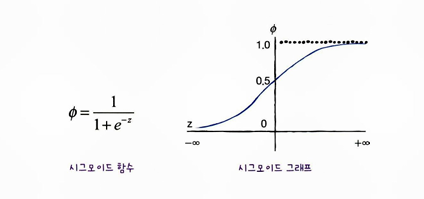


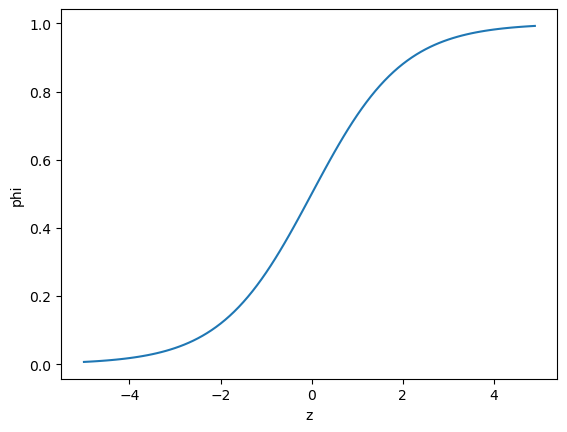

In [53]:
#시그모이드 함수

import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [54]:
# 불리언 인덱싱 : 넘파이 배열은 True, False 값을 전달하여 행 선택 가능
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


##### 로지스틱 회귀 이진 분류

In [55]:
# 이진 분류를 위해 훈련 세트에서 도미와 빙어의 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [56]:
# predict_proba() : 음성 클래스(0)와 양성 클래스(1)에 대한 확률 출력
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [57]:
#  로지스틱 회귀가 학습 한 선형 방정식의 계수 확인
print(lr.coef_, lr.intercept_)

# decision_function () : 양성 클래스에 대한 z값 반환
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

#  decisions 배열의 값을 확률로 변환
from scipy.special import expit
print(expit(decisions))

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


##### 로지스틱 회귀 다중 분류

In [58]:
# LogisticRegression 클래스로 다중 분류 모델 훈련
# L2 규제 : 릿지 회귀와 같이 계수의 제곱을 규제 (규제를 제어하는 매개변수 : C, 릿지 회귀 매개변수 alpha와 반대로 작을수록 규제가 커지고 클수록 규제 완화됨)
# max_iter : 반복 횟수, 기본값은 100
lr = LogisticRegression(C=20, max_iter=1000) 
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [59]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [60]:
# 클래스 정보
print(lr.classes_)
# 테스트 세트의 처음 5개 샘플에 대한 예측 확률 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 소수점 네 번째 자리에서 반올림

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [61]:
print(lr.coef_.shape, lr.intercept_.shape)

# 다중 분류는 클래스마다 z 값을 하나씩 계산 -> 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됨 
# 다중 분류는 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환

# 테스트 세트의 처음 5개 샘플에 대한 z1 ~ z7 값
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

# axis=l : 각 행, 즉 각 샘플에 대해 소프트맥스 계산 (지정 안할 시 배열 전체에 대해 계산)
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

(7, 5) (7,)
[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
